# Análise dos Dados do projeto Coral Vivo

## Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
DATA_PATH = 'Dados/'
BD_JAN_2022 = 'Banco_de_dados_JAN2022.xlsx'

## Funções

### Lê página da planilha

In [4]:
def read_sheet(file, sheet_name, cols, header):

    sheet = pd.read_excel(
        os.path.join(DATA_PATH + file),
        engine = 'openpyxl',
        sheet_name = sheet_name,
        usecols = cols,
        header = header
    )

    return sheet

### Plot de linha por ano

In [5]:
def plot_by_year(df, column, title):

    for ano in df['Ano'].unique():
        plt.plot(df.loc[df['Ano'] == ano][column], label = ano)

    plt.legend()
    plt.title(title)
    plt.xlabel(None)
    plt.ylabel(column)
    plt.show()

### Plot de linha de todas as colunas

In [6]:
def plot_all_columns(df):

    for column in df.columns[5:]:
        plot_by_year(
            df,
            column,
            'Curva de ' + column + ' ao longo dos anos'
        )

## Conjunto de Dados

### Banco de Dados - Janeiro de 2022

#### Água

In [7]:
bd_jan_2022_agua = read_sheet(BD_JAN_2022, 'Água', 'A:I', 3)

bd_jan_2022_agua.head()

,Recife,Ano,Mês,Lua,UA,Temperatura (C),pH,NO3,PO4
0,ECO,2018,JAN,NOVA,A,26.07,8.33,3.4,0.91
1,ECO,2018,JAN,NOVA,B,NaN,8.37,3.4,0.05
2,ECO,2018,JAN,NOVA,C,25.96,8.32,3.6,0.34
3,RFO,2018,JAN,CHEIA,A,26.52,8.19,2.0,0.08
4,RFO,2018,JAN,CHEIA,B,26.31,8.23,2.2,0.15


In [8]:
bd_jan_2022_agua.describe()

,Ano,Temperatura (C),pH,NO3,PO4
count,249.000000,245.000000,128.000000,69.000000,69.000000
mean,2019.445783,27.735180,8.271641,3.644058,0.108043
std,1.207367,1.406321,0.097414,2.446677,0.121693
min,2018.000000,24.159000,8.050000,0.300000,0.000000
25%,2018.000000,26.721000,8.197500,1.300000,0.050000
50%,2019.000000,27.658000,8.290000,3.400000,0.080000
75%,2021.000000,28.596000,8.342500,4.700000,0.120000
max,2022.000000,31.390000,8.460000,11.400000,0.910000


In [9]:
bd_jan_2022_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Recife           249 non-null    object 
 1   Ano              249 non-null    int64  
 2   Mês              249 non-null    object 
 3   Lua              249 non-null    object 
 4   UA               249 non-null    object 
 5   Temperatura (C)  245 non-null    float64
 6   pH               128 non-null    float64
 7   NO3              69 non-null     float64
 8   PO4              69 non-null     float64
dtypes: float64(4), int64(1), object(4)
memory usage: 17.6+ KB


In [10]:
bd_jan_2022_agua_group = bd_jan_2022_agua.groupby('Recife')
bd_jan_2022_agua_group_eco = bd_jan_2022_agua_group.get_group('ECO')
bd_jan_2022_agua_group_rfo = bd_jan_2022_agua_group.get_group('RFO')
bd_jan_2022_agua_group_ara = bd_jan_2022_agua_group.get_group('ARA')

- Recife ECO

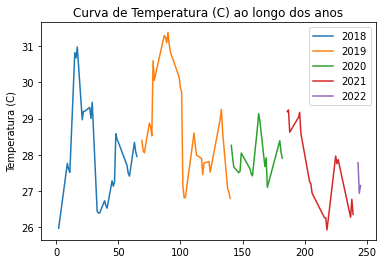

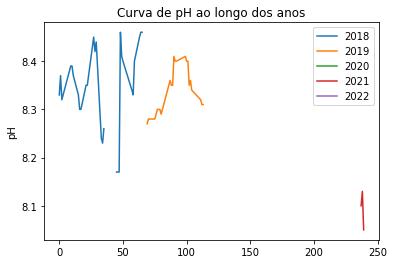

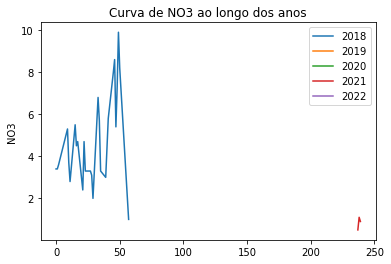

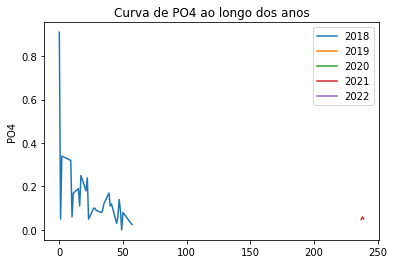

In [11]:
plot_all_columns(bd_jan_2022_agua_group_eco)

- Recife RFO

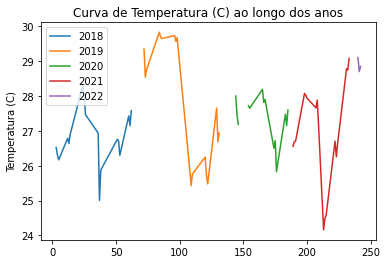

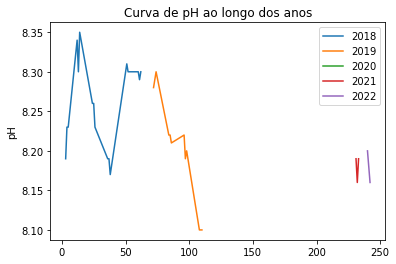

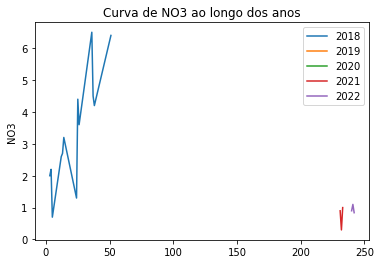

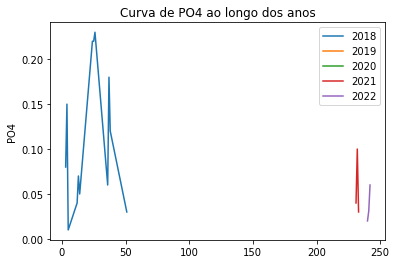

In [12]:
plot_all_columns(bd_jan_2022_agua_group_rfo)

- Recife ARA

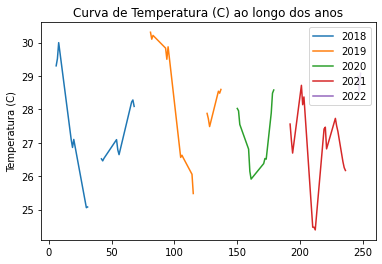

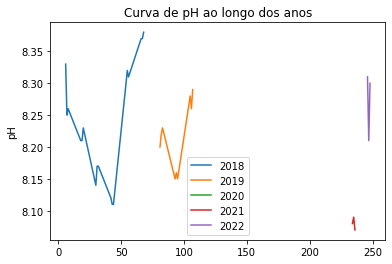

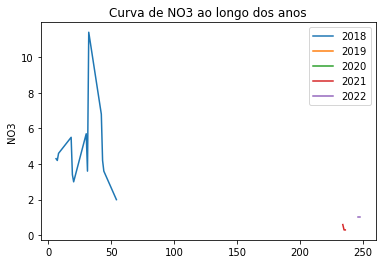

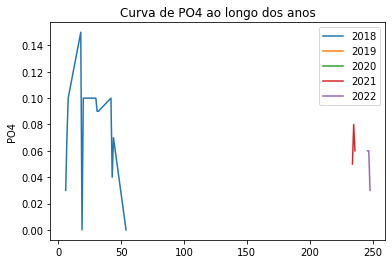

In [13]:
plot_all_columns(bd_jan_2022_agua_group_ara)

#### Cobertura geral

In [14]:
bd_jan_2022_cg = read_sheet(BD_JAN_2022, 'Cobertura_Geral', 'A:I', 3)
bd_jan_2022_cg.head()

,Recife,Ano,Mês,Lua,UA,Cobertura de corais*,Macroalgas *,Alga calcarea *,Branqueamento **
0,ECO,2018,JAN,NOVA,A,3,1,2,3
1,ECO,2018,JAN,NOVA,B,3,2,1,1
2,ECO,2018,JAN,NOVA,C,2,3,1,3
3,RFO,2018,JAN,CHEIA,A,3,2,1,3
4,RFO,2018,JAN,CHEIA,B,3,1,1,4


Observação:
- '*':                  
    - 1 [0-20%]
    - 2 [21-40%]
    - 3 [41-60%]
    - 4 [61-80%]
    - 5 [81-100%]

- '**':
    - 0 [Ausência total]
    - 1 [<5%]
    - 2 [6-10%]
    - 3 [11-20%]
    - 4 [21-40%]
    - 5 [41-60%]
    - 6 [61-80%] 
    - 7 [81-100%]

In [15]:
bd_jan_2022_cg.describe()

,Ano,Cobertura de corais*,Macroalgas *,Alga calcarea *,Branqueamento **
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2019.445783,1.943775,1.293173,1.389558,1.751004
std,1.207367,0.528284,0.514305,0.565161,1.704551
min,2018.000000,1.000000,1.000000,1.000000,0.000000
25%,2018.000000,2.000000,1.000000,1.000000,0.000000
50%,2019.000000,2.000000,1.000000,1.000000,1.000000
75%,2021.000000,2.000000,2.000000,2.000000,3.000000
max,2022.000000,3.000000,3.000000,3.000000,7.000000


In [16]:
bd_jan_2022_cg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Recife                249 non-null    object
 1   Ano                   249 non-null    int64 
 2   Mês                   249 non-null    object
 3   Lua                   249 non-null    object
 4   UA                    249 non-null    object
 5   Cobertura de corais*  249 non-null    int64 
 6   Macroalgas *          249 non-null    int64 
 7   Alga calcarea *       249 non-null    int64 
 8   Branqueamento **      249 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 17.6+ KB


In [17]:
bd_jan_2022_cg_group = bd_jan_2022_cg.groupby('Recife')
bd_jan_2022_cg_group_eco = bd_jan_2022_cg_group.get_group('ECO')
bd_jan_2022_cg_group_rfo = bd_jan_2022_cg_group.get_group('RFO')
bd_jan_2022_cg_group_ara = bd_jan_2022_cg_group.get_group('ARA')

- Recifo ECO

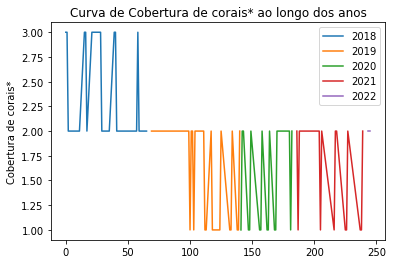

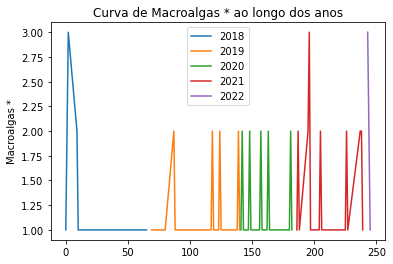

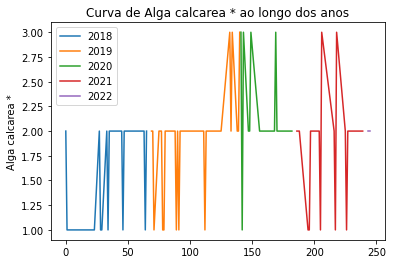

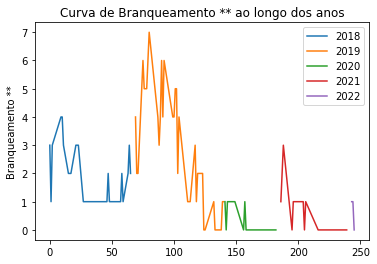

In [18]:
plot_all_columns(bd_jan_2022_cg_group_eco)

- Recifo RFO

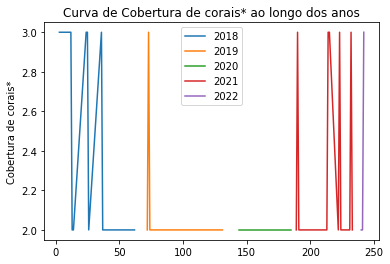

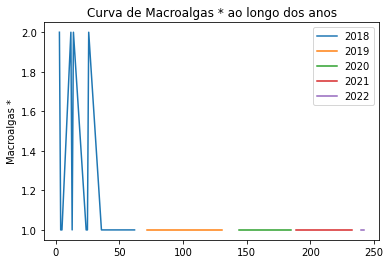

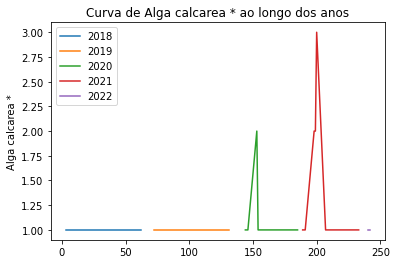

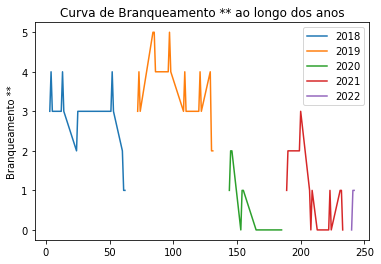

In [19]:
plot_all_columns(bd_jan_2022_cg_group_rfo)

- Recife ARA

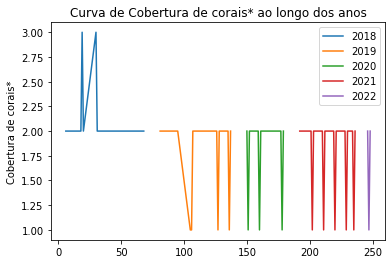

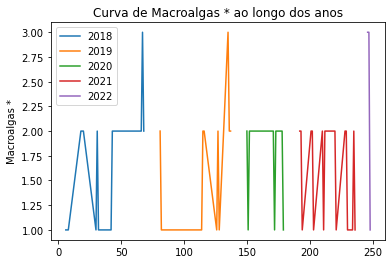

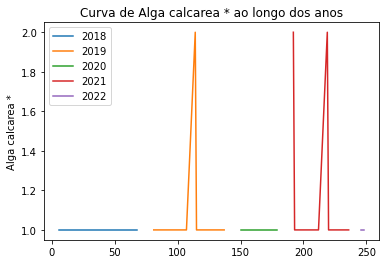

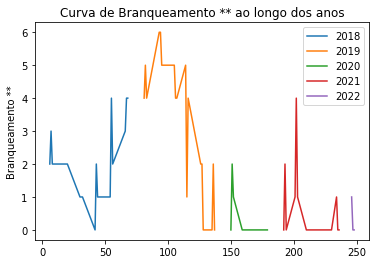

In [20]:
plot_all_columns(bd_jan_2022_cg_group_ara)

#### Corais - Número de colônias

In [21]:
bd_jan_2022_corais_ncolonias = read_sheet(BD_JAN_2022, 'Corais_Numero de colônias', 'A:Z', 1)

bd_jan_2022_corais_ncolonias.drop(
    ['Unnamed: 17', 'Unnamed: 21', 'Unnamed: 24'], 
    axis = 1, inplace = True
)

bd_jan_2022_corais_ncolonias.rename(
    columns = {
        'Palythoa caribaeorum': 'Zoantídeo_Palythoa caribaeorum',
        'Zoanthus spp.': 'Zoantídeo_Zoanthus spp.',
        'Millepora alcicornis': 'Hidrocorais_Millepora alcicornis'
    }, inplace = True
)

bd_jan_2022_corais_ncolonias.head()

,Recife,Ano,Mês,Lua,UA,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Scolymia wellsi,Meandrina braziliensis,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
0,ECO,2018,JAN,NOVA,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ECO,2018,JAN,NOVA,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ECO,2018,JAN,NOVA,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,RFO,2018,JAN,CHEIA,A,5,6,0,0,4,0,0,6,4,33,0,0,9,0,0,0,0,2
4,RFO,2018,JAN,CHEIA,B,5,11,11,0,7,7,3,3,3,17,0,0,8,0,0,0,0,4


In [22]:
bd_jan_2022_corais_ncolonias.describe()

,Ano,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Scolymia wellsi,Meandrina braziliensis,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2019.445783,35.714859,35.497992,2.353414,0.108434,3.313253,4.706827,1.216867,4.694779,5.289157,32.827309,0.048193,0.0,11.373494,1.433735,0.899598,0.321285,0.349398,3.465863
std,1.207367,33.958986,35.086773,7.331687,0.311554,3.750036,3.463868,2.209117,4.660577,4.012672,17.678761,0.232636,0.0,12.870989,2.992704,1.591928,0.971981,1.093608,4.306765
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,3.000000,18.000000,0.000000,0.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,28.000000,23.000000,0.000000,0.000000,2.000000,5.000000,0.000000,3.000000,4.000000,33.000000,0.000000,0.0,8.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2021.000000,58.000000,62.000000,0.000000,0.000000,7.000000,7.000000,2.000000,7.000000,7.000000,46.000000,0.000000,0.0,16.000000,0.000000,1.000000,0.000000,0.000000,5.000000
max,2022.000000,122.000000,136.000000,33.000000,1.000000,15.000000,15.000000,10.000000,18.000000,18.000000,79.000000,2.000000,0.0,58.000000,16.000000,7.000000,8.000000,9.000000,24.000000


In [23]:
bd_jan_2022_corais_ncolonias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Recife                            249 non-null    object
 1   Ano                               249 non-null    int64 
 2   Mês                               249 non-null    object
 3   Lua                               249 non-null    object
 4   UA                                249 non-null    object
 5   Agaricia humilis                  249 non-null    int64 
 6   Favia gravida                     249 non-null    int64 
 7   Mussismilia leptophylla           249 non-null    int64 
 8   Montastrea cavernosa              249 non-null    int64 
 9   Mussismilia braziliensis          249 non-null    int64 
 10  Mussismilia harttii               249 non-null    int64 
 11  Mussismilia hispida               249 non-null    int64 
 12  Porites astreoides    

#### Corais - Número de recrutas

In [24]:
bd_jan_2022_corais_nrecrutas = read_sheet(BD_JAN_2022, 'Corais_numero de recrutas', 'A:Z', 1)

bd_jan_2022_corais_nrecrutas.drop(
    ['Unnamed: 17', 'Unnamed: 21', 'Unnamed: 24'], 
    axis = 1, inplace = True
)

bd_jan_2022_corais_nrecrutas.rename(
    columns = {
        'Palythoa caribaeorum': 'Zoantídeo_Palythoa caribaeorum',
        'Zoanthus spp.': 'Zoantídeo_Zoanthus spp.',
        'Millepora alcicornis': 'Hidrocorais_Millepora alcicornis'
    }, inplace = True
)

bd_jan_2022_corais_nrecrutas.head()

,Recife,Ano,Mês,Lua,UA,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Meandrina braziliensis,Scolymia wellsi,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
0,ECO,2018,JAN,NOVA,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ECO,2018,JAN,NOVA,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ECO,2018,JAN,NOVA,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,RFO,2018,JAN,CHEIA,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RFO,2018,JAN,CHEIA,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
bd_jan_2022_corais_nrecrutas.describe()

,Ano,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Meandrina braziliensis,Scolymia wellsi,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
count,249.000000,249.000000,249.000000,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0,249.000000,249.000000
mean,2019.433735,19.208835,27.373494,0.040161,0.0,0.216867,0.032129,0.044177,0.068273,0.606426,11.200803,0.016064,0.040161,1.305221,0.048193,0.072289,0.0,0.028112,0.080321
std,1.216746,20.205311,29.696466,0.456134,0.0,0.730359,0.296097,0.314399,0.457198,1.962789,9.533464,0.125976,0.216258,3.253288,0.367103,0.405103,0.0,0.340796,0.423091
min,2018.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2019.000000,13.000000,19.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2021.000000,32.000000,41.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,2022.000000,96.000000,113.000000,6.000000,0.0,5.000000,4.000000,3.000000,5.000000,14.000000,40.000000,1.000000,2.000000,17.000000,4.000000,4.000000,0.0,5.000000,5.000000


In [26]:
bd_jan_2022_corais_nrecrutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Recife                            249 non-null    object
 1   Ano                               249 non-null    int64 
 2   Mês                               249 non-null    object
 3   Lua                               249 non-null    object
 4   UA                                249 non-null    object
 5   Agaricia humilis                  249 non-null    int64 
 6   Favia gravida                     249 non-null    int64 
 7   Mussismilia leptophylla           249 non-null    int64 
 8   Montastrea cavernosa              249 non-null    int64 
 9   Mussismilia braziliensis          249 non-null    int64 
 10  Mussismilia harttii               249 non-null    int64 
 11  Mussismilia hispida               249 non-null    int64 
 12  Porites astreoides    

#### Corais - Branqueamento (%)

In [27]:
bd_jan_2022_corais_branqueamento = read_sheet(BD_JAN_2022, 'Corais_branqueamento (%)', 'A:X', 2)

bd_jan_2022_corais_branqueamento.drop(
    ['Unnamed: 15', 'Unnamed: 19', 'Unnamed: 22'], 
    axis = 1, inplace = True
)

bd_jan_2022_corais_branqueamento.rename(
    columns = {
        'Palythoa caribaeorum': 'Zoantídeo_Palythoa caribaeorum',
        'Zoanthus spp.': 'Zoantídeo_Zoanthus spp.',
        'Millepora alcicornis': 'Hidrocorais_Millepora alcicornis'
    }, inplace = True
)

bd_jan_2022_corais_branqueamento.head()

,Recife,Ano,Mês,Lua,UA,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
0,ECO,2018,JAN,NOVA,A,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0
1,ECO,2018,JAN,NOVA,B,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0
2,ECO,2018,JAN,NOVA,C,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
3,RFO,2018,JAN,CHEIA,A,0,0,0,0,0,5,0,0,5,4,0,0,0,0,0,0
4,RFO,2018,JAN,CHEIA,B,0,0,0,0,0,4,0,0,2,2,0,0,0,0,0,0


Observação:
- 0 [Ausência total]
- 1 [<5%]
- 2 [6-10%]
- 3 [11-20%]
- 4 [21-40%]
- 5 [41-60%]
- 6 [61-80%]
- 7 [81-100%]                        

In [28]:
bd_jan_2022_corais_branqueamento.describe()

,Ano,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,255.000000,255.0,255.000000
mean,2019.423529,0.858824,1.027451,0.043137,0.050980,0.415686,1.749020,0.556863,0.411765,0.635294,1.454902,0.501961,0.0,0.0,0.043137,0.0,0.960784
std,1.204092,1.819533,1.847330,0.357845,0.576226,1.452580,2.404013,1.723992,1.309813,1.451421,1.666284,1.457737,0.0,0.0,0.504021,0.0,2.242755
min,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
50%,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
75%,2020.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
max,2022.000000,7.000000,7.000000,4.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.0,0.0,7.000000,0.0,7.000000


In [29]:
bd_jan_2022_corais_branqueamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Recife                            255 non-null    object
 1   Ano                               255 non-null    int64 
 2   Mês                               255 non-null    object
 3   Lua                               255 non-null    object
 4   UA                                255 non-null    object
 5   Agaricia humilis                  255 non-null    int64 
 6   Favia gravida                     255 non-null    int64 
 7   Mussismilia leptophylla           255 non-null    int64 
 8   Montastrea cavernosa              255 non-null    int64 
 9   Mussismilia braziliensis          255 non-null    int64 
 10  Mussismilia harttii               255 non-null    int64 
 11  Mussismilia hispida               255 non-null    int64 
 12  Porites astreoides    

#### Corais - Outras patologias (%)

In [30]:
bd_jan_2022_corais_patalogia = read_sheet(BD_JAN_2022, 'Corais_outras patologias (%)', 'A:X', 2)

bd_jan_2022_corais_patalogia.drop(
    ['Unnamed: 15', 'Unnamed: 19', 'Unnamed: 22'], 
    axis = 1, inplace = True
)

bd_jan_2022_corais_patalogia.rename(
    columns = {
        'Palythoa caribaeorum': 'Zoantídeo_Palythoa caribaeorum',
        'Zoanthus spp.': 'Zoantídeo_Zoanthus spp.',
        'Millepora alcicornis': 'Hidrocorais_Millepora alcicornis'
    }, inplace = True
)

bd_jan_2022_corais_patalogia.head()

,Recife,Ano,Mês,Lua,UA,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
0,ECO,2018,JAN,NOVA,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ECO,2018,JAN,NOVA,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ECO,2018,JAN,NOVA,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,RFO,2018,JAN,CHEIA,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,RFO,2018,JAN,CHEIA,B,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Observação:
- 1 [<5%]
- 2 [6-10%]
- 3 [11-20%]
- 4 [21-40%]
- 5 [41-60%]
- 6 [61-80%]
- 7 [81-100%]                        

In [31]:
bd_jan_2022_corais_patalogia.describe()

,Ano,Agaricia humilis,Favia gravida,Mussismilia leptophylla,Montastrea cavernosa,Mussismilia braziliensis,Mussismilia harttii,Mussismilia hispida,Porites astreoides,Porites branneri,Siderastrea stellata,Muriceopsis sulphurea,Phyllogorgia dilatata,Plexaurella grandiflora,Zoantídeo_Palythoa caribaeorum,Zoantídeo_Zoanthus spp.,Hidrocorais_Millepora alcicornis
count,249.000000,249.000000,249.000000,249.0,249.0,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.0,249.0,249.000000
mean,2019.445783,0.044177,0.032129,0.0,0.0,0.004016,0.044177,0.036145,0.152610,0.048193,0.823293,0.160643,0.096386,0.080321,0.0,0.0,0.068273
std,1.207367,0.383711,0.217602,0.0,0.0,0.063372,0.314399,0.302374,0.684508,0.332523,1.301712,0.739372,0.514651,0.525148,0.0,0.0,0.482932
min,2018.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,2018.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,2019.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,2021.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,2022.000000,5.000000,2.000000,0.0,0.0,1.000000,4.000000,3.000000,4.000000,3.000000,6.000000,5.000000,4.000000,4.000000,0.0,0.0,5.000000


In [32]:
bd_jan_2022_corais_patalogia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Recife                            249 non-null    object
 1   Ano                               249 non-null    int64 
 2   Mês                               249 non-null    object
 3   Lua                               249 non-null    object
 4   UA                                249 non-null    object
 5   Agaricia humilis                  249 non-null    int64 
 6   Favia gravida                     249 non-null    int64 
 7   Mussismilia leptophylla           249 non-null    int64 
 8   Montastrea cavernosa              249 non-null    int64 
 9   Mussismilia braziliensis          249 non-null    int64 
 10  Mussismilia harttii               249 non-null    int64 
 11  Mussismilia hispida               249 non-null    int64 
 12  Porites astreoides    